# Evaluating Customer Satisfaction and Preferences in the Telecommunications Industry: A Comparative Analysis of Survey Data and Online Reviews

In [1]:
import pandas as pd
import math
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# functions to help with markdown output
from IPython.core.display import Markdown

_markdown_lines = []

def mprint(text):
    global _markdown_lines
    _markdown_lines.append(text)

def mflush(file_path:str=None, show:bool=True):
    global _markdown_lines
    markdown_string = "\n".join(_markdown_lines)

    # save the markdown to a file
    if file_path:
        with open(file_path, "w") as f:
            f.write(markdown_string)
    
    # render the markdown
    if show:
        display(Markdown(markdown_string))

    # Clear the lines after displaying the markdown
    _markdown_lines = []

def mclear():
    global _markdown_lines
    _markdown_lines = []

## 1. Research topic and background

### 1.1 Introduction

This study investigates customer satisfaction levels and preferences around using artificial intelligence-driven technologies in the telecommunications industry. The rapid advancement in AI has led to tools such as chatbots becoming an integral part of customer service, and while AI-driven technologies can offer personalised and efficient solutions that significantly increase client satisfaction rates, studying the effectiveness and impact of these technologies remains a critical area of investigation.

To comprehensively understand customer perspectives, we first conducted a survey targeting the major South African telecommunications providers. This survey aimed to gather insights into customer service preferences, the adoption rate of AI-driven tools, and the influence of demographic variables on these preferences. Subsequently, we analysed a vast pool of online customer complaints from Hellopeter.com, focusing on reviews mentioning chatbots. This two-pronged approach allowed us to juxtapose direct customer feedback from the survey against the more public sentiment found in online reviews.

**Overview of the Report**: The structure of this report is methodical, beginning with a detailed background on the rise of AI in the telecommunications industry. We then delve into the motivation, objectives, and research questions we sought to answer. The report discusses the methodology, particularly highlighting our data sources, which comprise both primary survey data and secondary data from online reviews. After detailing our data processing steps, the report presents a comprehensive analysis, visualising key insights and drawing connections between various data points. The study concludes by summarising our key findings, evaluating our methodologies, and suggesting future research directions.

**Key Findings**: Our research uncovered several pivotal insights. Firstly, there is a significant discrepancy between general customer satisfaction and satisfaction with AI tools, particularly chatbots. Younger demographics, while more accustomed to digital interactions, expressed concerns over the effectiveness of AI tools. Moreover, our analysis of online reviews revealed a predominant sentiment that chatbots, despite their ubiquity, often fail to understand or resolve user queries adequately. These insights underscore the pressing need for further refinement in AI-driven customer service tools to enhance the user experience.

### 1.2 Background and context

The emergence of Artificial Intelligence (AI) has significantly impacted industries, including telecommunications, ranging from finance, healthcare and manufacturing, all potentially disrupted by these technologies (Dwivedi et al., 2021). For example, AI plays an essential role in today’s telecommunications industry, where it can make predictions about decisions, use big data to offer solutions and interact with customers in real-time via conversational agents (Sardjono et al., 2023).

AI-driven technologies such as chatbots, process automation, and automated customer support systems are transforming customer service from human-driven to technology-dominant (Castillo et al., 2021). This transformation offers many advantages, such as improving efficiency, reducing cost and enhancing the customer experience through personalised user interactions. For example, chatbots can handle routing queries and allow their human counterparts to focus on complex, high-value issues. However, as discussed by (Castillo et al., 2021), these technologies can also fail and have negative consequences leading to customer confusion, anger and dissatisfaction, and as mentioned in the introduction, studying the impact and effectiveness of these tools remains critical.

### 1.3 Motivation and objectives

Objectives:
1. Evaluate overall satisfaction among customers towards their telecommunication customer service encounters while concurrently identifying the elements behind positive and negative experiences.
2. Investigate customer perception of AI-based service tools like chatbots and assess their effectiveness in offering efficient and personalised customer service.
3. Explore the potential correlation between consumer satisfaction and customer service tools that leverage AI technology.
4. Identify and provide concrete recommendations on how AI tools can enhance satisfaction levels and strengthen market position.

Potential impact:
1. Improving customer service strategies: By understanding customer preferences and experiences, telecommunications companies can identify areas to focus on where AI-based tools can provide the most significant value.
2. Boosting customer satisfaction and loyalty: Based on the trends identified in this study, telecommunications companies can increase customer satisfaction and loyalty by enhancing their existing customer service tools.
3. Encouraging AI-driven customer service tool adoption: This study seeks to understand factors limiting the adoption of AI tools. These findings may help telecommunications companies better promote AI-driven customer service tools, improving customer experiences and reducing workloads for customer service representatives.
4. Informing industry practices: The output of this study will contribute to a broader understanding of customer satisfaction and preferences in the telecommunications industry. These insights can prove valuable when designing practices to improve customer service.

### 1.4 Sample and population

The target population for this study is the five major South African telecommunications providers, namely Cell C, MTN, Rain, Telkom, and Vodacom. Ideally, stratified random sampling should be used to get a representative sample from each provider according to their market size. Unfortunately, this was not be possible due to budget and time constraints. Instead, snowball sampling were employed by asking for respondents on LinkedIn and requesting the initial respondents to refer other customers within their social network who might be interested in participating.

Using snowball sampling. some selection bias were present. To minimise the impact, should the data indicate, for example, that respondents are primarily from a single provider, the scope will be narrowed to focus on this provider, reducing the extent to which findings can be generalised.

### 1.5 Research question(s)

1. How does customer satisfaction with a telecommunications provider’s customer service differ by the various demographic groups? 

Rationale: According to some studies (Kassim, 2006; Saha* & Joshi, 2019), demographic factors such as age, gender and marital status can have a significant effect on perceptions of performance and satisfaction. 

2. How do customers perceive the effectiveness and level of personalisation offered by AI-driven customer service tools?

Rationale: AI-driven tools have become increasingly popular in customer service with the promise of reduced labour costs. However, some consumers resist tools like chatbots (Li et al., 2020) and prefer traditional human-based customer service. Therefore, it is essential to understand this aspect and find ways to improve adaptation rates and trust in AI-driven tools.

3. Is there a relationship between customer satisfaction and using AI-driven customer service tools?

Rationale: Understanding the correlation can help business improve their customer service strategies and ultimately improve customer loyalty and retention (Chen et al., 2021; Ganguli & Roy, 2011).

4. Based on insights gathered in the survey and comparing it with online complaint behaviour, what are the critical areas for improvement in customer service within the telecommunications industry?

By analysing the trends from the survey data in conjunction with customer complaints from platforms such as Hellopeter (Foulds, 2022), we aim to discover actionable insights that will assist telecommunications in finding key focus areas to improve customer service through AI-driven tools. 

### 1.6 Domain concepts

The following domain concepts will be considered in this study:

- **Customer satisfaction**: The feelings of pleasure or disappointment a customer derives from the performance of a product or service related to individual expectations (Riak & Bill, 2022).

- **Customer service**: The support and assistance a company provides to those who buy or use its products or services (Meuter et al., 2000). 

- **AI-driven customer service tools**: Technology-enabled service tools, such as chatbots, that leverage artificial intelligence (AI) for evaluating real-time service scenarios to provide personalised recommendations, alternatives, and solutions to customer enquiries or problems (Xu et al., 2020).

- **Chatbots**: An AI-driven customer service tool acting as a conversational agent equipped with AI to interact with customers using spoken or written language (Baez et al., 2021).

## 2. Data sources

### 2.1 Survey data

#### 2.1.1 Research questions map to survey questions

| Research question | Survey question(s) |
| --- | :--- |
| How does customer satisfaction with a telecommunications provider’s customer service differ by the various demographic groups? |Q1 - Q5. Which demographic group do you belong to (occupation, gender, age, education and marital status)?<br /><br />Q6. Who is your primary telecommunications provider?<br /><br />Q7. How long have you been a customer of your current telecommunications provider?<br /><br />Q8. Are you a prepaid or contract customer?
|How do customers perceive the effectiveness and level of personalisation offered by AI-driven customer service tools?|Q9. Which customer service channel do you prefer when contacting your telecommunications provider?<br /><br />Q11. Have you ever used an AI-powered customer service tool (e.g., virtual assistant) when contacting your telecommunications provider?<br /><br />Q12. If you answered “Yes” to the previous question, on a scale of 1 to 5, with 1 being “very dissatisfied” and 5 being “very satisfied”, how would you rate your experience with AI-powered customer service tools?<br /><br />Q13. In your opinion, do AI-driven customer service tools provide personalised and effective solutions to your queries or issues?|
|Is there a relationship between customer satisfaction and using AI-driven customer service tools?|Q10. On a scale of 1 to 5, with 1 being “very dissatisfied” and 5 being “very satisfied”, how would you rate your overall satisfaction with your provider’s customer service?<br /><br />Q11. Have you ever used an AI-powered customer service tool (e.g., virtual assistant) when contacting your telecommunications provider? (mapped again)|
|Based on insights gathered in the survey and comparing it with online complaint behaviour, what are the critical areas for improvement in customer service within the telecommunications industry?|Q14. Please describe a recent customer service interaction with your telecommunications provider (positive or negative). Include the date (or approximate date) of the interaction.|

#### 2.1.2 Operational Definitions

| Concept/Behaviour | Question(s) | Discussion |
| --- | --- | :--- |
|Demographic Data|Q1 – Q5|Only five questions are used for this category to keep the survey short while retaining factors showing the literature to have an effect as it relates to chatbots. This study also aims explicitly to understand if there is a correlation between demographics and customer satisfaction.|
|Customer Segmentation|Q6 – Q8|These specific questions allow us to create further distinct customer groupings, which can be compared and will be important when collecting from our secondary data sources.|
|Customer Preferences|Q9, Q11|In addition to understanding the preferred channel for customer service, these questions also allow us to estimate the adoption rates of AI service tools.|
|Customer Satisfaction|Q10, Q12, Q13|This set of questions allows us to examine overall customer service satisfaction and gauge the contribution made by the AI tools.|
|Opportunities for Improvement|Q14 – Q15|The free-text question helps us understand customer behaviour and pain points to look for opportunities for improvement. This information will also be compared with findings from online customer complaints. By looking at the sentiment of the input, we can also compare how recent interactions might affect customer satisfaction.|

#### 2.1.3 Survey structure and question flow

The initial section of our survey comprises a few questions intended to gather basic demographic information from our participants. These questions are relatively simple and require minimal commitment and thus may motivate participation by making respondents feel more comfortable with providing their input. Next, a series of questions are asked about the respondent’s telecommunications provider to set the context for the rest of the survey. These questions are followed by a set of questions that focus on AI-driven service, which is the main topic of the research. Finally, the survey closes with an open-ended question which allows the respondent to provide more detailed and personal insights.

We must remain mindful of three areas where potential bias could be introduced in our final analysis.

1. **Leading Questions**: Question 13 might be a leading question assuming that AI tools provide personalised and effective solutions. Respondents do, however, have the option to indicate that they strongly disagree with the statement.
2. **Response Bias**: Question 10 and 12 uses a 5-point scale and might lead to central tendency bias. However, the initial review of online customer complaints showed that customers had strong negative sentiments when their expectations were unmet.
3. **Recall Bias**: Respondents might not accurately remember all details depending on how recent the interaction was. To minimise this, we ask the customer to specify the approximate date so we can account for it during analysis.

### 2.2 External data

A related study collected customer reviews for Cell C, MTN, Telkom, and Vodacom from Hellopeter.com (Foulds, 2022). This data will provide valuable insights when used with the data collected via survey. The online customer reviews/complaints will be particularly useful in answering RQ4. Through systematic analysis, we can meet Objective 4: Identify and provide concrete recommendations on how AI tools can enhance satisfaction levels and strengthen market position.

The secondary data has a star rating and unstructured text content similar to what is collected in the survey. In the previous study, there were no significant data quality issues. It is worth noting that the reviews are predominately customer complaints. The data is anonymised and publicly available. The ethical evaluation for using this data was already considered when the previous study was submitted to the University of London.

#### 2.2.1 Hellpeter Data Collection

Hellopeter data was extracted from `January 2021` to `July 2023` via the Hellopeter API. Please refer to supplementary notebook `01-01_retrieve_data.ipynb` for the reference code. 

| Step | Description | Review Count |
| --- | :--- | ---: |
| Initial Retrieval | Retrieve all reviews in the specified range and combine them in `01-02_combine_data.ipynb` | 93,880 |
| Filter for Chatbot Reviews | A keyword filter is applied in `01-03_chatbot_reviews.ipynb` to select only reviews that mention chatbots. | 564 |
| LLM filtering | The OpenAI LLM `gpt-3.5-turbo` is used for further filtering to ensure the reviews are related to chatbots. (`01-04_chatbot_classify.ipynb` and `01-05_combine_classifications.ipynb`) | 235 |

Aspect-Based Sentiment Analysis was done on the final filtered dataset in `01-09_gpt_absa.ipynb` using the `gpt-4` model.

## 3. Data overview and pre-processing

### 3.1 Data types and pre-processing

In [3]:
class DataTypes:
    @staticmethod
    def set_category(dataframe:pd.DataFrame, column_name:str) -> None:
        """Set the specified column to be a category type."""
        dataframe[column_name] = dataframe[column_name].astype('category')

    @staticmethod
    def set_ordinal(dataframe:pd.DataFrame, column_name:str, categories:List[str]) -> None:
        """Set the specified column to be a ordered category type."""
        dataframe[column_name] = dataframe[column_name].astype(
            pd.CategoricalDtype(categories=categories, ordered=True))

    @staticmethod
    def likert_to_ordinal(dataframe:pd.DataFrame, column_name:str, mapping:Dict[int, str]) -> None:
        """Set the specified column to be a ordered category type."""
        dataframe[column_name] = dataframe[column_name] \
            .map(mapping) \
            .astype(pd.CategoricalDtype(categories=mapping.values(), ordered=True))
    
    @staticmethod
    def set_boolean(dataframe:pd.DataFrame, column_name:str) -> None:
        """Set the specified column to be a boolean type."""
        dataframe[column_name] = dataframe[column_name].astype('bool')

    @staticmethod
    def set_date(dataframe:pd.DataFrame, column_name:str, format:str) -> None:
        """Set the specified column to be a date type."""
        dataframe[column_name] = pd.to_datetime(dataframe[column_name], format=format)

#### 3.1.1 Survey Data

The survey response is read from an Excel file exported from the survey tool. To make the data easier to work with, we rename columns as follows:

| Original Question| Column Name |
| :--- | :--- |
| Unique Response Number | id |
| 1. What is your occupation? | occupation |
| 2. Which gender do you most strongly identify with? | gender |
| 3. What is your age? | age |
| 4. What is the highest education level you have received? | education |
| 5. What is your marital status? | marital_status |
| 6. Who is your primary telecommunications provider? | provider |
| 7. How long have you been a customer of your current telecommunications provider? | customer_years |
| 8. Are you a prepaid or contract customer? | customer_type |
| 9. Which customer service channel do you prefer when contacting your telecommunications provider? | preferred_channel |
| 10. On a scale of 1 to 5, with 1 being "very dissatisfied" and 5 being "very satisfied", how would you rate your overall satisfaction with your provider's customer service? | satisfaction_overall |
|11. Have you ever used an AI-powered customer service tool (e.g. chatbot) when contacting your telecommunications provider?|used_ai|
|12. If you answered "Yes" to the previous question, on a scale of 1 to 5, with 1 being "very dissatisfied" and 5 being "very satisfied", how would you rate your experience with AI-powered customer service tools?|satisfaction_ai|
| 13. In your opinion, do AI-driven customer service tools provide personalised and effective solutions to your queries or issues? | effective_ai |
| 15. Please provide your best estimate of the date | review_date |

In [4]:
def load_survey_data(file_path:str) -> pd.DataFrame:
    """Load the data gathered via Survey"""
    # read the dataset
    df_result = pd.read_excel(
        io=file_path,
        usecols=[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18])

    # assign column names
    df_result.columns = [
        'id',
        'occupation',
        'gender',
        'age',
        'education',
        'marital_status',
        'provider',
        'customer_years',
        'customer_type',
        'preferred_channel',
        'satisfaction_overall',
        'used_ai',
        'satisfaction_ai',
        'effective_ai',
        'review_date'
    ]

    return df_result

In [5]:
# load the survey data
df_survey = load_survey_data('../../data/raw/results-for-telecommunica-2023-08-08-0844.xlsx')

# show the first 3 rows
print(f'Number of Responses, and columns: {df_survey.shape}')
display(df_survey.head(3))

Number of Responses, and columns: (40, 15)


,id,occupation,gender,age,education,marital_status,provider,customer_years,customer_type,preferred_channel,satisfaction_overall,used_ai,satisfaction_ai,effective_ai,review_date
0,1058192-1058174-111830520,Employed,Male,35-44 years,Bachelor Degree,Married or domestic partnership,Vodacom,More than 5 years,Contract,Phone,5,Yes,3.0,Agree,01/01/2023
1,1058192-1058174-111884750,Employed,Female,35-44 years,Masters Degree/MBA or similar,Married or domestic partnership,Vodacom,More than 5 years,Hybrid,Phone,4,Yes,3.0,Neutral,16/06/2022
2,1058192-1058174-111894339,Employed,Male,45-54 years,Bachelor Degree,Divorced,Other,2-5 years,Contract,In-person,5,Yes,1.0,Disagree,15/05/2023


We now convert the data types to simplify analysis. The details of each conversion are found in the `SurveyDataTypes` class shown below.

In [6]:
class SurveyDataTypes:
    @staticmethod
    def set_categorical_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
        """Set the datatype for all categorical columns"""
        DataTypes.set_category(dataframe, 'occupation')
        DataTypes.set_category(dataframe, 'gender')
        DataTypes.set_category(dataframe, 'marital_status')
        DataTypes.set_category(dataframe, 'provider')
        DataTypes.set_category(dataframe, 'customer_type')
        DataTypes.set_category(dataframe, 'preferred_channel')

        return dataframe

    @staticmethod
    def set_ordinal_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
        """Set the datatype for all ordinal columns"""
        # What is your age? 
        DataTypes.set_ordinal(dataframe, 'age', [
            'Under 18 years',
            '18-24 years',
            '25-34 years',
            '35-44 years',
            '45-54 years',
            '55-64 years',
            '65 years or older'])

        # What is the highest education level you have received?
        DataTypes.set_ordinal(dataframe, 'education', [
            'Less than high school degree',
            'Highschool graduate or similar',
            'Bachelor Degree',
            'Masters Degree/MBA or similar',
            'Doctoral Degree/PhD'])

        # How long have you been a customer of your current telecommunications provider?
        DataTypes.set_ordinal(dataframe, 'customer_years', [
            'Less than 6 months',
            '6 months to 1 year',
            '1-2 years',
            '2-5 years',
            'More than 5 years'])

        # In your opinion, do AI-driven customer service tools provide personalised and effective solutions to your queries or issues? 
        DataTypes.set_ordinal(dataframe, 'effective_ai', [
            'Strongly agree',
            'Agree',
            'Neutral',
            'Disagree',
            'Strongly disagree'])

        return dataframe    

    @staticmethod
    def set_likert_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
        """Map likert 1-5 questions to oridinal values"""

        # define the mapping
        mapping = {
            1: 'Very Dissatisfied',
            2: 'Dissatisfied',
            3: 'Neutral',
            4: 'Satisfied',
            5: 'Very Satisfied'
        }

        # On a scale of 1 to 5, with 1 being "very dissatisfied" and 5 being "very satisfied",
        # how would you rate your overall satisfaction with your provider's customer service?
        DataTypes.likert_to_ordinal(dataframe, 'satisfaction_overall', mapping)

        # If you answered "Yes" to the previous question, on a scale of 1 to 5, with 1 being 
        # "very dissatisfied" and 5 being "very satisfied", how would you rate your experience
        # with AI-powered customer service tools?
        DataTypes.likert_to_ordinal(dataframe, 'satisfaction_ai', mapping)

        return dataframe

    @staticmethod
    def set_boolean_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
        """Update the datatype of boolean columns"""
        dataframe['used_ai'] = dataframe['used_ai'].map({'Yes': 1, 'No': 0})
        DataTypes.set_boolean(dataframe, 'used_ai')

        return dataframe

    @staticmethod
    def set_date_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
        """Set the datatype for columns containing dates"""
        DataTypes.set_date(dataframe, 'review_date', '%d/%m/%Y')

        return dataframe        

In [7]:
df_survey = df_survey \
    .pipe(SurveyDataTypes.set_categorical_columns) \
    .pipe(SurveyDataTypes.set_ordinal_columns) \
    .pipe(SurveyDataTypes.set_likert_columns) \
    .pipe(SurveyDataTypes.set_boolean_columns) \
    .pipe(SurveyDataTypes.set_date_columns)

The majority of the data types are converted to `category` with the following columns converted to ordinals:

- age
- education
- customer_years
- effective_ai

The 'satisfaction_overall' and 'satisfaction_ai' were 1-5 Likert scales in the survey and were mapped using the following labels:

```python
1: 'Very Dissatisfied',
2: 'Dissatisfied',
3: 'Neutral',
4: 'Satisfied',
5: 'Very Satisfied'
```

The question corresponding to the `used_ai` column was a Yes/No question and converted to boolean.

Finally, the `review_date` column was converted to a `datetime` using `%d/%m/%Y` as the format string.

In [8]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    40 non-null     object        
 1   occupation            40 non-null     category      
 2   gender                40 non-null     category      
 3   age                   40 non-null     category      
 4   education             40 non-null     category      
 5   marital_status        40 non-null     category      
 6   provider              40 non-null     category      
 7   customer_years        40 non-null     category      
 8   customer_type         40 non-null     category      
 9   preferred_channel     40 non-null     category      
 10  satisfaction_overall  40 non-null     category      
 11  used_ai               40 non-null     bool          
 12  satisfaction_ai       24 non-null     category      
 13  effective_ai          

ℹ️ **Note**: The `satisfaction_ai` column contains null values for respondents who did not use AI-driven customer service tools.

#### 3.1.2 Hellopeter Data

Here, we load the Hellopeter reviews that were filtered for chatbot reviews, map the `business_slug` column to the `provider` column in the survey data, and convert the `review_date` column to a `datetime` using `%Y-%m-%d %H:%M:%S` as the format string.

Columns from previous experimental classifications are removed, and we are left with a tidy dataset containing the following columns:

| Column Name | Description |
| :--- | :--- |
| id | Unique Identification Number |
| created_at | Date of the review |
| review_title | Title of the review |
| review_content | Text of the review |
| provider | Telecommunications provider |

In [9]:
class ReviewLoader:
    @staticmethod
    def load_hellopeter_reviews(file_path:str) -> pd.DataFrame:
        """Load the data gathered from Hellopeter"""
        # read the dataset
        df_result = pd.read_parquet(file_path)
        df_result.set_index('id', inplace=True)

        return df_result

    @staticmethod
    def add_provider_column(dataframe:pd.DataFrame) -> pd.DataFrame:
        """map the business slug to the provider to match the survey data"""
        dataframe['provider'] = dataframe['business_slug'].map({
            'vodacom': 'Vodacom',
            'mtn': 'MTN',
            'optus': 'Telkom',
            'cell-c': 'Cell C',
            'rain-internet-service-provider': 'Other'
        })

        return dataframe
    
    @staticmethod
    def drop_columns(dataframe:pd.DataFrame) -> pd.DataFrame:
        """Drop columns that are not relevant to the study"""
        columns = [
            'business_slug',
            'chatbot_related',
            'chatbot_evidence',
            'chatbot_classification',
            'chatbot_description',
            'chatbot_suggestion',
            'complaint_classification',
            'complaint_service',
            'complaint_description',
            'complaint_suggestion',
            'human_chatbot_classification',
            'human_complaint_classification'
        ]

        return dataframe.drop(columns=columns)

    @staticmethod
    def set_data_types(dataframe:pd.DataFrame) -> pd.DataFrame:
        """Set the data types for the Hellopeter reviews"""
        # set the data column datatype
        DataTypes.set_date(dataframe, 'created_at', '%Y-%m-%d %H:%M:%S')

        # set the review rating datatype
        dataframe['review_rating'] = dataframe['review_rating'].astype('int')

        # set the provider datatype
        DataTypes.set_category(dataframe, 'provider')


        return dataframe

In [10]:
# load the hellopeter reviews
review_path = '../../data/interim/01-06_human_classified.parquet'
df_reviews = ReviewLoader.load_hellopeter_reviews(review_path) \
    .pipe(ReviewLoader.add_provider_column) \
    .pipe(ReviewLoader.drop_columns) \
    .pipe(ReviewLoader.set_data_types)

# show the first 3 rows
print(f'Number of Reviews, and columns: {df_reviews.shape}')
display(df_reviews.head(3))

Number of Reviews, and columns: (235, 5)


,created_at,review_rating,review_title,review_content,provider
id,,,,,
3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,Vodacom
3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,Vodacom
3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,Vodacom


The datatypes are shown below, where the review title and content are string values.

In [11]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      235 non-null    datetime64[ns]
 1   review_rating   235 non-null    int64         
 2   review_title    235 non-null    object        
 3   review_content  235 non-null    object        
 4   provider        208 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 9.6+ KB


Next, we load the Aspect Based Sentiment Analysis data for each review. There is a one-to-many mapping between the reviews and the aspects, so we have tidy data at this stage.

In [12]:
class AspectLoader:
    @staticmethod
    def load_aspects(file_path:str) -> pd.DataFrame:
        """Load the aspects gathered from Hellopeter"""
        # read the dataset
        df_result = pd.read_parquet(file_path)
        df_result.set_index('id', inplace=True)

        return df_result

    @staticmethod
    def set_data_types(dataframe:pd.DataFrame) -> pd.DataFrame:
        """Set the data types for the aspect dataset"""
        # set the categorical data types
        DataTypes.set_category(dataframe, 'entity')
        DataTypes.set_category(dataframe, 'aspect')

        # replace Mixed polarity with Neutral
        dataframe['polarity'] = dataframe['polarity'] \
            .replace('Mixed', 'Neutral')

        # set polarity as an ordinal datatype
        DataTypes.set_ordinal(dataframe, 'polarity', [
            'Negative',
            'Neutral',
            'Positive'])

        return dataframe

In the aspect dataset, an `entity` is a grouping of `aspects`, while the `polarity` column indicates the sentiment of the aspect.

In [13]:
# load the hellopeter review aspects
aspects_path = '../../data/interim/01-09_absa.parquet'
df_aspects = AspectLoader.load_aspects(aspects_path) \
    .pipe(AspectLoader.set_data_types)

# show the first 3 rows
print(f'Rows and Columns loaded: {df_aspects.shape}')
display(df_aspects.head(3))

Rows and Columns loaded: (1595, 3)


,entity,aspect,polarity
id,,,
3344640,Customer Service,"Availability (e.g., 24/7 support)",Negative
3344640,Chatbots,User-friendliness,Negative
3344640,Chatbots,Ability to understand query,Negative


### 3.2 Data summary statistics

#### 3.2.1 Responses and Observations

In [14]:
mprint(f'- The number of responses in the survey dataset: `{df_survey.shape[0]}`')
mprint(f'- The number of observations in the Hellopeter review dataset: `{df_reviews.shape[0]}`')
mflush()

- The number of responses in the survey dataset: `40`
- The number of observations in the Hellopeter review dataset: `235`

#### 3.2.2 A Summary of the key variables from the survey dataset

##### Gender Distribution

Most of the respondents were male. Interestingly, none of the respondents chose to identified as non-binary.

In [15]:
display(df_survey['gender'].value_counts(normalize=True).to_frame() * 100)

,proportion
gender,
Male,72.5
Female,27.5


##### Age Distribution

The majority of the respondents were between `25` and `54` years old. Most survey responses come from LinkedIn, which could explain this.

In [16]:
display(df_survey['age'].value_counts(normalize=True).to_frame() * 100)

,proportion
age,
25-34 years,40.0
35-44 years,32.5
45-54 years,27.5
Under 18 years,0.0
18-24 years,0.0
55-64 years,0.0
65 years or older,0.0


##### Education Level Distribution

It is significant to note that `82.5%` of respondents have a `Bachelor's Degree` or higher.

In [17]:
display(df_survey['education'].value_counts(normalize=True).to_frame() * 100)

,proportion
education,
Bachelor Degree,52.5
Masters Degree/MBA or similar,27.5
Highschool graduate or similar,17.5
Doctoral Degree/PhD,2.5
Less than high school degree,0.0


##### Overall Satisfaction Distribution

`65%` of all respondents report that they are either `Satisfied` or `Very Satisfied` with their provider.

In [18]:
display(df_survey['satisfaction_overall'].value_counts(normalize=True).to_frame() * 100)

,proportion
satisfaction_overall,
Satisfied,52.5
Neutral,25.0
Very Satisfied,12.5
Very Dissatisfied,7.5
Dissatisfied,2.5


##### Telecommunications Provider

Most respondents are customers of `Vodacom (50%)`, followed by `MTN (25%)`.

In [19]:
df_survey['provider'].value_counts(normalize=True).to_frame() * 100

,proportion
provider,
Vodacom,50.0
MTN,25.0
Telkom,17.5
Cell C,5.0
Other,2.5


##### Satisfaction by Provider

We note that `MTN` has the highest percentage `(30%)` of `Dissatisfied` customers in the survey data.

In [20]:
pd.crosstab(
    df_survey['provider'],
    df_survey['satisfaction_overall'],
    margins=True,
    margins_name="Total",
    normalize='index') * 100

satisfaction_overall,Very Dissatisfied,Dissatisfied,Neutral,Satisfied,Very Satisfied
provider,,,,,
Cell C,0.0,0.0,50.000000,50.000000,0.000000
MTN,20.0,10.0,10.000000,50.000000,10.000000
Other,0.0,0.0,0.000000,0.000000,100.000000
Telkom,0.0,0.0,28.571429,57.142857,14.285714
Vodacom,5.0,0.0,30.000000,55.000000,10.000000
Total,7.5,2.5,25.000000,52.500000,12.500000


##### Use of AI Tools

`57.5%` of respondents indicated that they had used an AI-powered customer service tool (e.g. chatbot) when contacting their telecommunications provider. However, we should note that `Vodacom` has the strongest AI initiative, with `65%` of respondents indicating that they have used an AI-powered customer service tool.

In [21]:
pd.crosstab(
    df_survey['provider'],
    df_survey['used_ai'],
    margins=True,
    margins_name="Total",
    normalize='index') * 100

used_ai,False,True
provider,,
Cell C,50.000000,50.000000
MTN,50.000000,50.000000
Other,0.000000,100.000000
Telkom,57.142857,42.857143
Vodacom,35.000000,65.000000
Total,42.500000,57.500000


#### Review Sentiment

`Vodacom` has the strongest chatbot capability and focuses on automating customer service through its TOBi chatbot. It naturally follows that most of the reviews are for `Vodacom`. When analysing the reviews, we will focus on this provider.

In [22]:
display(df_reviews['provider'].value_counts(normalize=True).to_frame() * 100)

,proportion
provider,
Vodacom,95.673077
MTN,2.884615
Cell C,0.961538
Other,0.480769


- Most Hellopeter reviews are negative, indicated by an average sentiment score of `-1.0`.
- `Vodacom` has the most reviews, discussing a total number of `1,363` aspects.
- Vodacom also has an Average Sentiment Score of less than `-1.0`, indicating that there are at least some aspects mentioned in either a neutral or positive light.

In [23]:
# Join df_aspects with df_reviews to get the provider information
df_aspects_with_provider = df_aspects.join(df_reviews['provider'], how='left')

# Map the polarity to numerical scores
polarity_mapping = {
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1
}
df_aspects_with_provider['polarity_score'] = df_aspects_with_provider['polarity'] \
    .map(polarity_mapping) \
    .astype('int')


# Group by provider and aggregate sentiment scores
grouped_aspects_by_provider = df_aspects_with_provider \
    .groupby('provider')['polarity_score'] \
    .agg(['sum', 'count', 'mean']).reset_index()

grouped_aspects_by_provider.columns = ['Provider', 'Total Sentiment Score', 'Number of Mentions', 'Average Sentiment Score']
display(grouped_aspects_by_provider)


,Provider,Total Sentiment Score,Number of Mentions,Average Sentiment Score
0,Cell C,-17,17,-1.000000
1,MTN,-44,44,-1.000000
2,Other,-6,6,-1.000000
3,Vodacom,-1272,1363,-0.933236


## 4. Analysis

### 4.1 Individual Variables Visualization

In [24]:
def plot_individual_distributions(data:pd.DataFrame, columns:List[str], hspace:float=1) -> None:
    """Create a histogram for each column specified.
    There MUST be 5 columns"""
    assert len(columns) == 5, 'There must be 5 columns'

    # Set up the figure and axes
    fig = plt.figure(figsize=(15, 15))

    # Create 2x2 grid for first 4 plots
    grid = plt.GridSpec(3, 2, hspace=hspace, wspace=0.4)

    # First 4 plots
    for i, col in enumerate(columns[:-1]):
        ax = fig.add_subplot(grid[i//2, i%2])
        plot_values = data[col].value_counts()
        if isinstance(data[col].dtype, pd.CategoricalDtype) and data[col].dtype.ordered:
            plot_values = plot_values.sort_index()

        plot_values.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Distribution of {col}', fontsize=14)
        ax.set_ylabel('Count')
        ax.grid(axis='y')

    # 5th plot spanning both columns
    ax = fig.add_subplot(grid[2, :])
    data[columns[-1]].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {columns[-1]}', fontsize=14)
    ax.set_ylabel('Count')
    ax.grid(axis='y')

plt.show()    

#### 4.1.1 Demographic Overview

1. **Gender Distribution**: We can observe the distribution of respondents by gender. In this survey, there are more male respondents than female.

2. **Age Distribution**: The age distribution shows the number of respondents in each age group. Most respondents in this sample are between the ages of 25-34.

3. **Marital Status Distribution**: This chart provides insight into the marital status of the respondents. The majority are in a 'Married or domestic partnership' status.

4. **Occupation Distribution**: Here, we see the professional background of the respondents. Nearly all respondents are employed.

5. **Education Distribution**: The education distribution highlights the highest level of education received by the respondents. The sample primarily consists of those with a Bachelor's Degree, followed by those with a Master's or MBA.


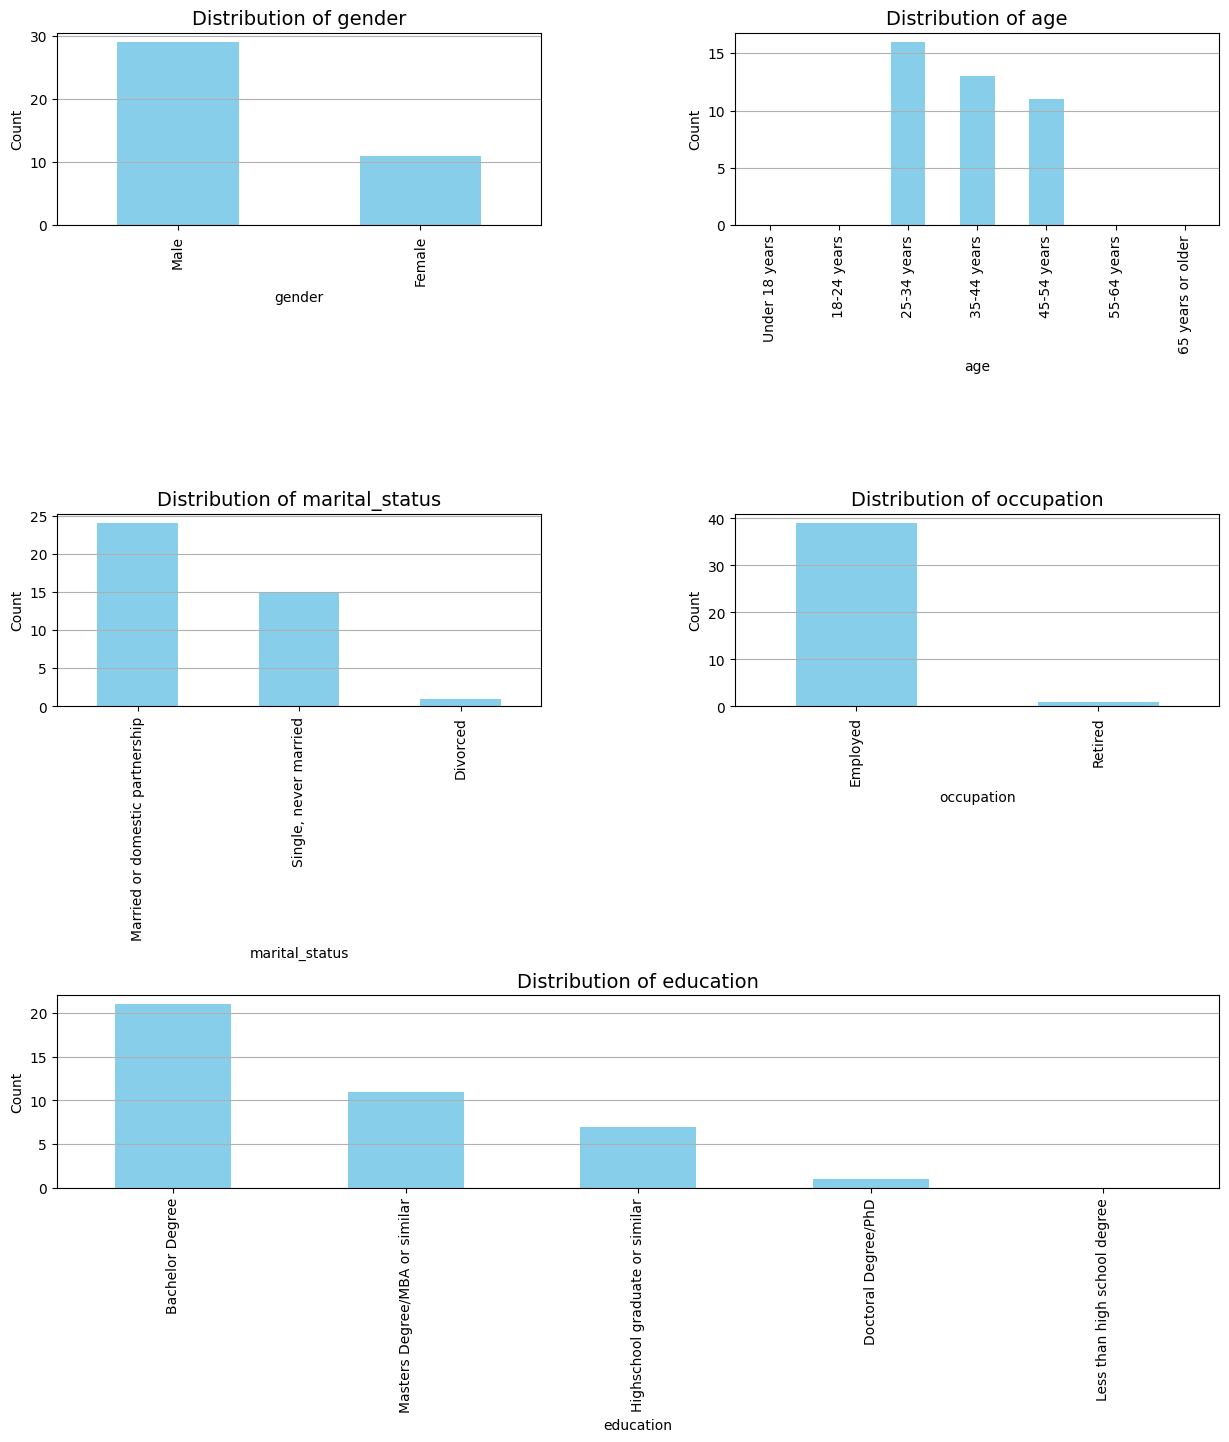

In [25]:
# list of demographic columns to plot
demographic_columns = ['gender', 'age', 'marital_status', 'occupation', 'education']
plot_individual_distributions(df_survey, demographic_columns, hspace=1.5)

#### 4.1.2 Customer Service Overview

1. **Provider Distribution**: In this survey, Vodacom has more respondents than other providers.

2. **Customer Years Distribution**: This showcases how long respondents have been customers with their current provider. Most respondents in this sample have been with their provider for over 5 years.

3. **Customer Type Distribution**: Here, we see whether respondents have a contract, are prepaid, or use some hybrid option. In this sample, most are on a contract.

4. **Preferred Channel Distribution**: This chart displays the preferred channels respondents use to contact their service provider. Most prefer using the phone, thus choosing traditional customer service over digital channels and self-service tools like chatbots.

5. **Overall Satisfaction Distribution**: This provides an insight into the overall satisfaction levels of the respondents with their provider's customer service. Most respondents in this sample are satisfied with their provided, which logically follows most being long-term customers.

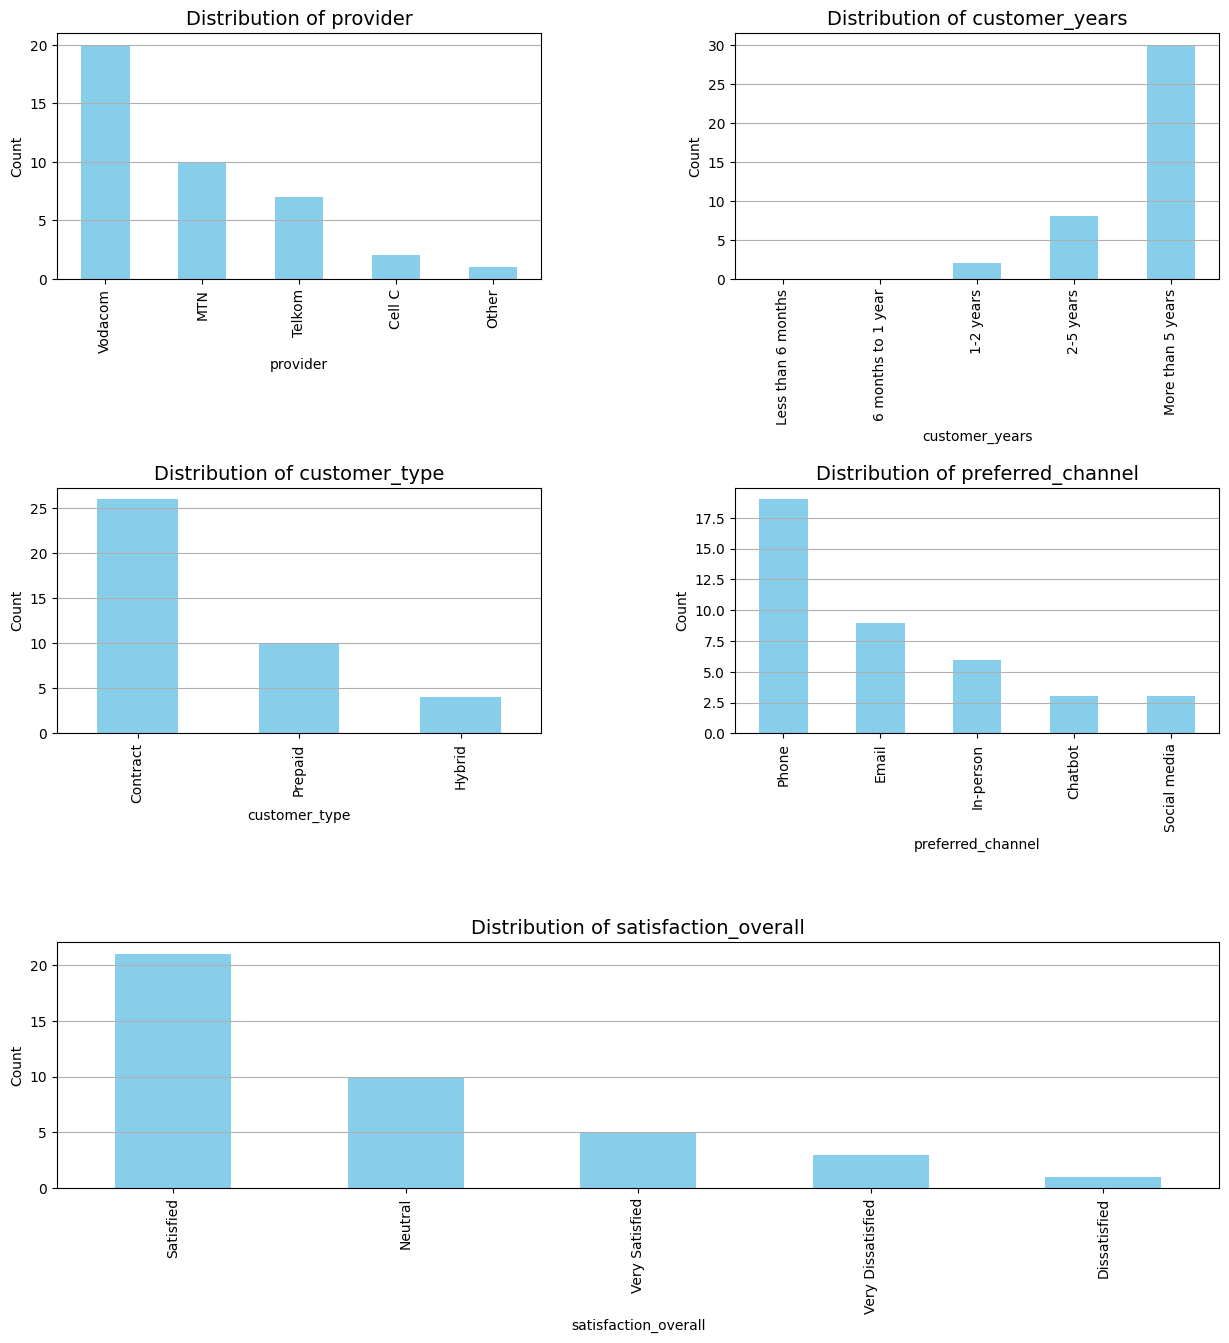

In [26]:
# List of customer service columns to plot
customer_service_columns = ['provider', 'customer_years', 'customer_type', 'preferred_channel', 'satisfaction_overall']
plot_individual_distributions(df_survey, customer_service_columns, hspace=0.85)

#### 4.1.3 AI Tools Overview

1. **Adoption of AI Tools (Pie Chart)**: This chart displays the proportion of respondents who have used AI tools versus those who haven't. In this sample, 57.5% of respondents have used AI tools.

2. **Satisfaction with AI Tools (Bar Chart)**: Here, we see the distribution of respondents' satisfaction levels with AI tools. Very few respondents who have used AI tools are satisfied with them, and most are neutral or dissatisfied. This is an interesting finding and indicates room for improvement in this area.

3. **Perception of AI's Effectiveness (Bar Chart)**: We asked all respondents to indicate their perception of the effectiveness of AI tools. Again, it is interesting that most respondents do not believe AI tools are effective.

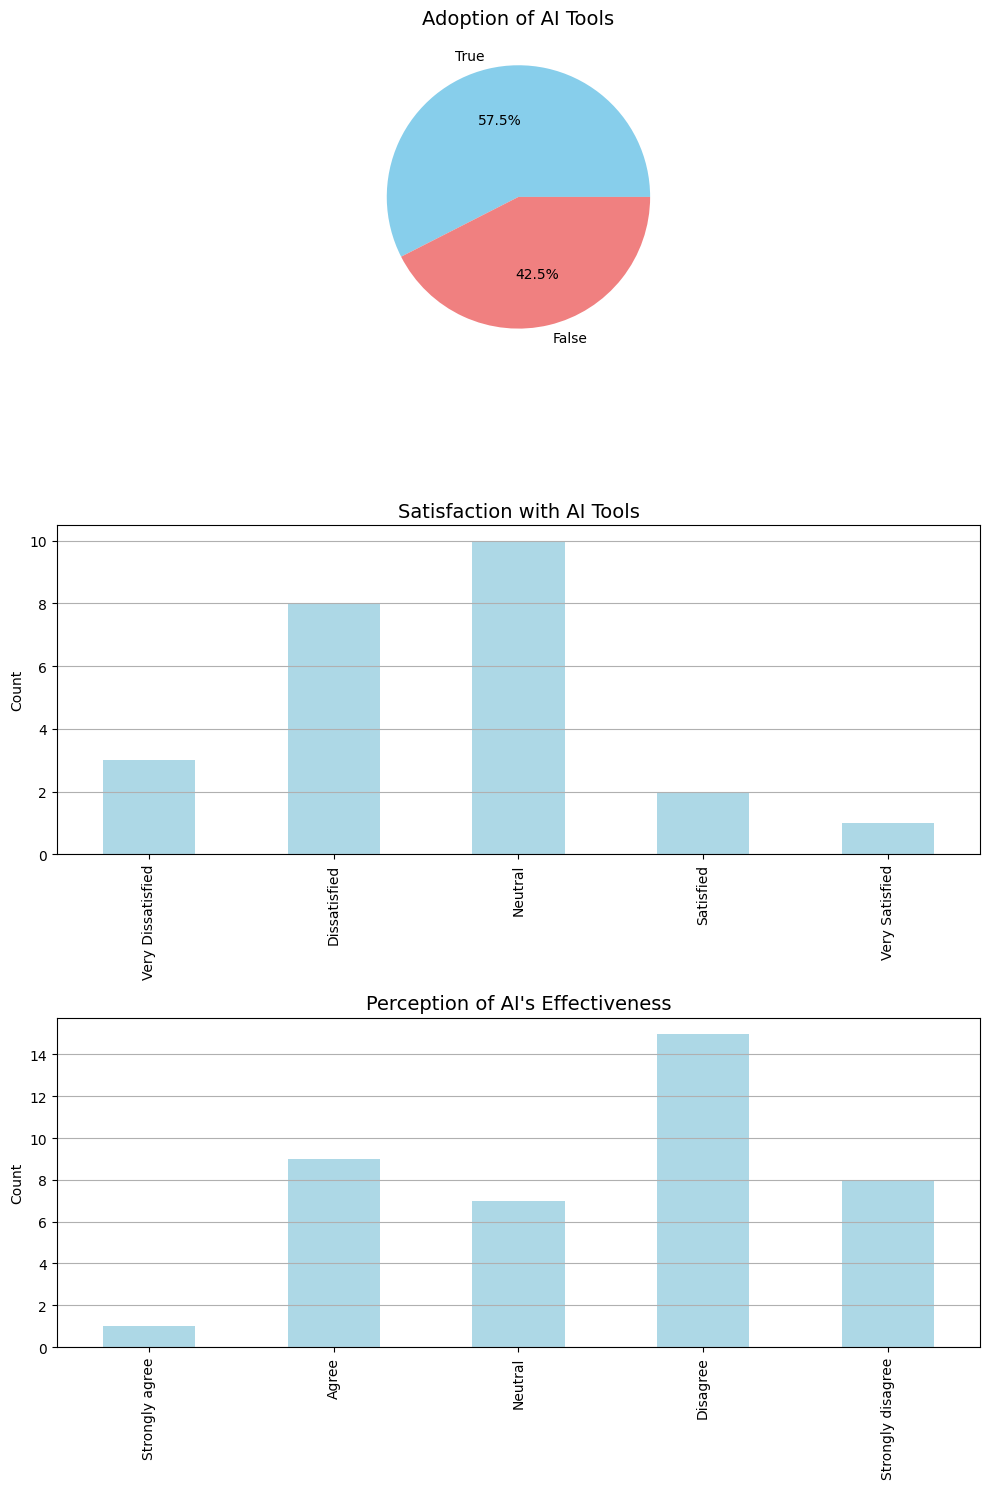

In [27]:
# Plotting AI Tools Overview
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Pie chart for Used AI
df_survey['used_ai'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0].set_title('Adoption of AI Tools', fontsize=14)
axes[0].set_ylabel('')

# Bar chart for Satisfaction with AI
df_survey['satisfaction_ai'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightblue')
axes[1].set_title('Satisfaction with AI Tools', fontsize=14)
axes[1].set_ylabel('Count')
axes[1].set_xlabel(None)
axes[1].grid(axis='y')

# Bar chart for Perception of AI's Effectiveness
df_survey['effective_ai'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='lightblue')
axes[2].set_title("Perception of AI's Effectiveness", fontsize=14)
axes[2].set_ylabel('Count')
axes[2].set_xlabel(None)
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()

### 4.2 Relationships between Variables

#### 4.2.1 Customer Satisfaction by Demographics

These visualizations help us understand how customer satisfaction varies across different demographic groups, addressing RQ1. There seem to be little difference in satisfaction levels across the demographic groups.

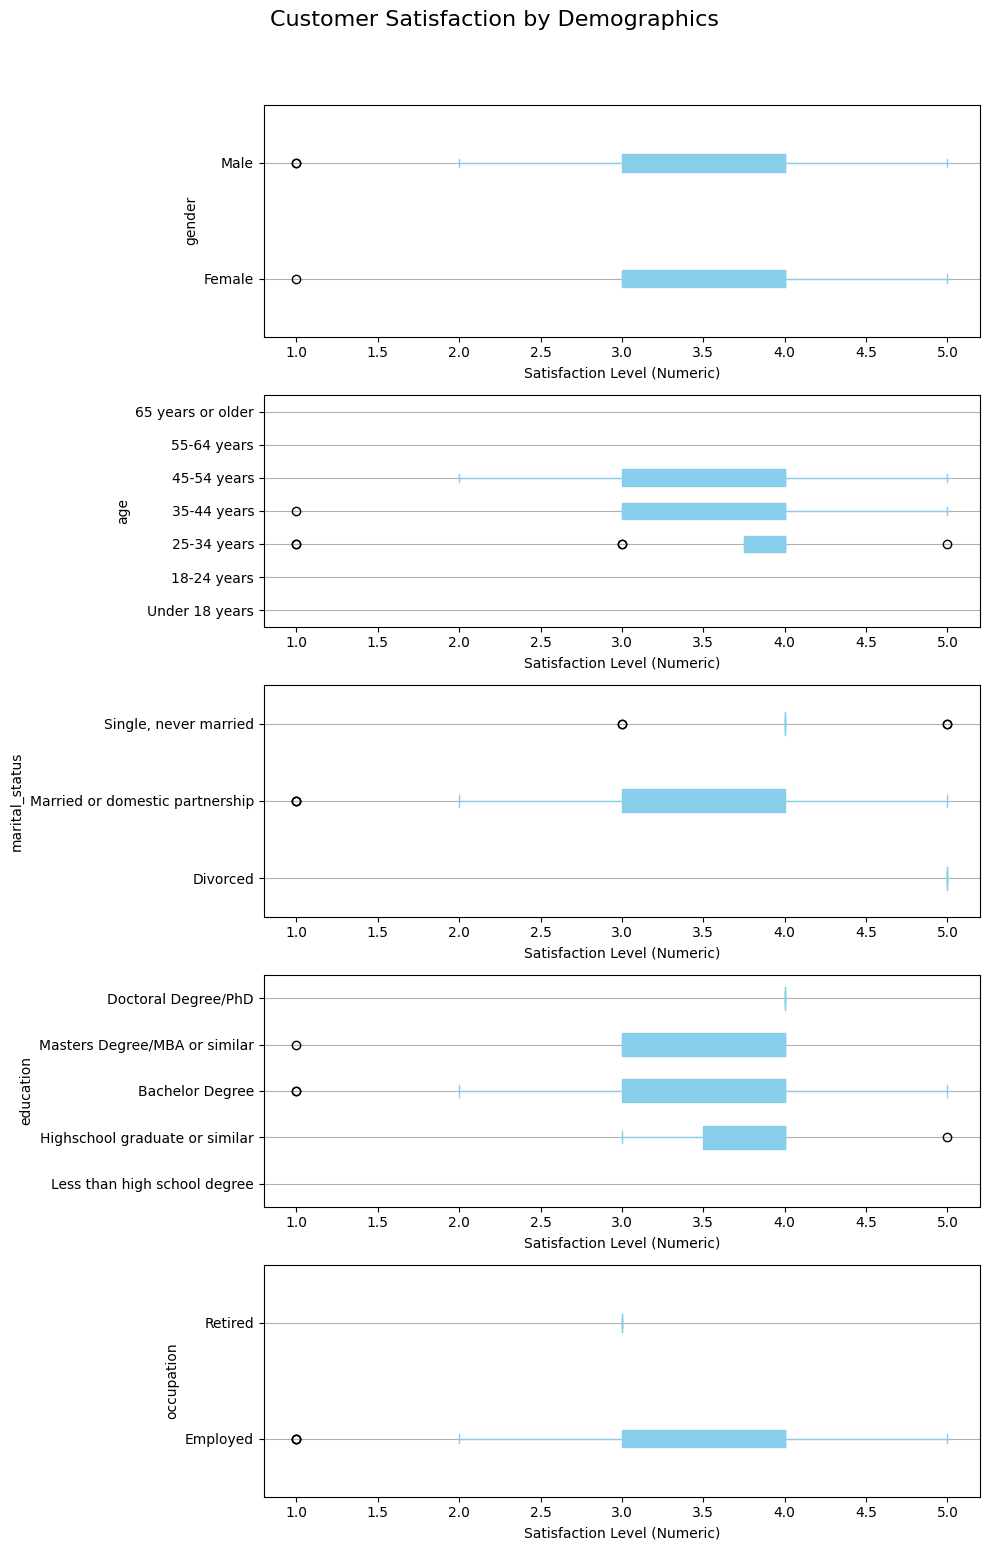

In [28]:
# list of demographic columns for reference
demographic_columns = ['gender', 'age', 'marital_status', 'education', 'occupation']

# add the satisfaction_overall_numeric column
plot_data:pd.DataFrame = df_survey.copy()
plot_data['satisfaction_overall_numeric'] = plot_data['satisfaction_overall'].map({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
})

# plotting the box plots for "Customer Satisfaction by Demographics"
fig, axes = plt.subplots(nrows=len(demographic_columns), figsize=(10, 15))

for i, col in enumerate(demographic_columns):
    plot_data.boxplot(column='satisfaction_overall_numeric', by=col, ax=axes[i], grid=True, vert=False, patch_artist=True, color='skyblue')
    axes[i].set_title(f'Satisfaction Overall vs. {col}', fontsize=14)
    axes[i].set_xlabel('Satisfaction Level (Numeric)')
    axes[i].set_ylabel(col)
    # Removing auto-generated title
    axes[i].set_title('')
    axes[i].grid(axis='x')

# Setting main title for all subplots
fig.suptitle('Customer Satisfaction by Demographics', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

#### 4.2.2 Perception of AI-driven Tools

1. **Satisfaction with AI vs. Demographics (left column)**: This set of charts shows the distribution of satisfaction levels with AI tools across various demographic groups.

2. **Perception of AI's Effectiveness vs. Demographics (right column)**: Here, we see the distribution of perceptions about the effectiveness of AI tools across demographic groups.

These visualizations help us address RQ2 and understand how different demographic groups perceive AI-driven tools.

An interesting demographic is age. We see that younger respondents (25-34 years) mostly have neutral satisfaction levels with AI, while this same group also mostly believes that AI tools are ineffective.

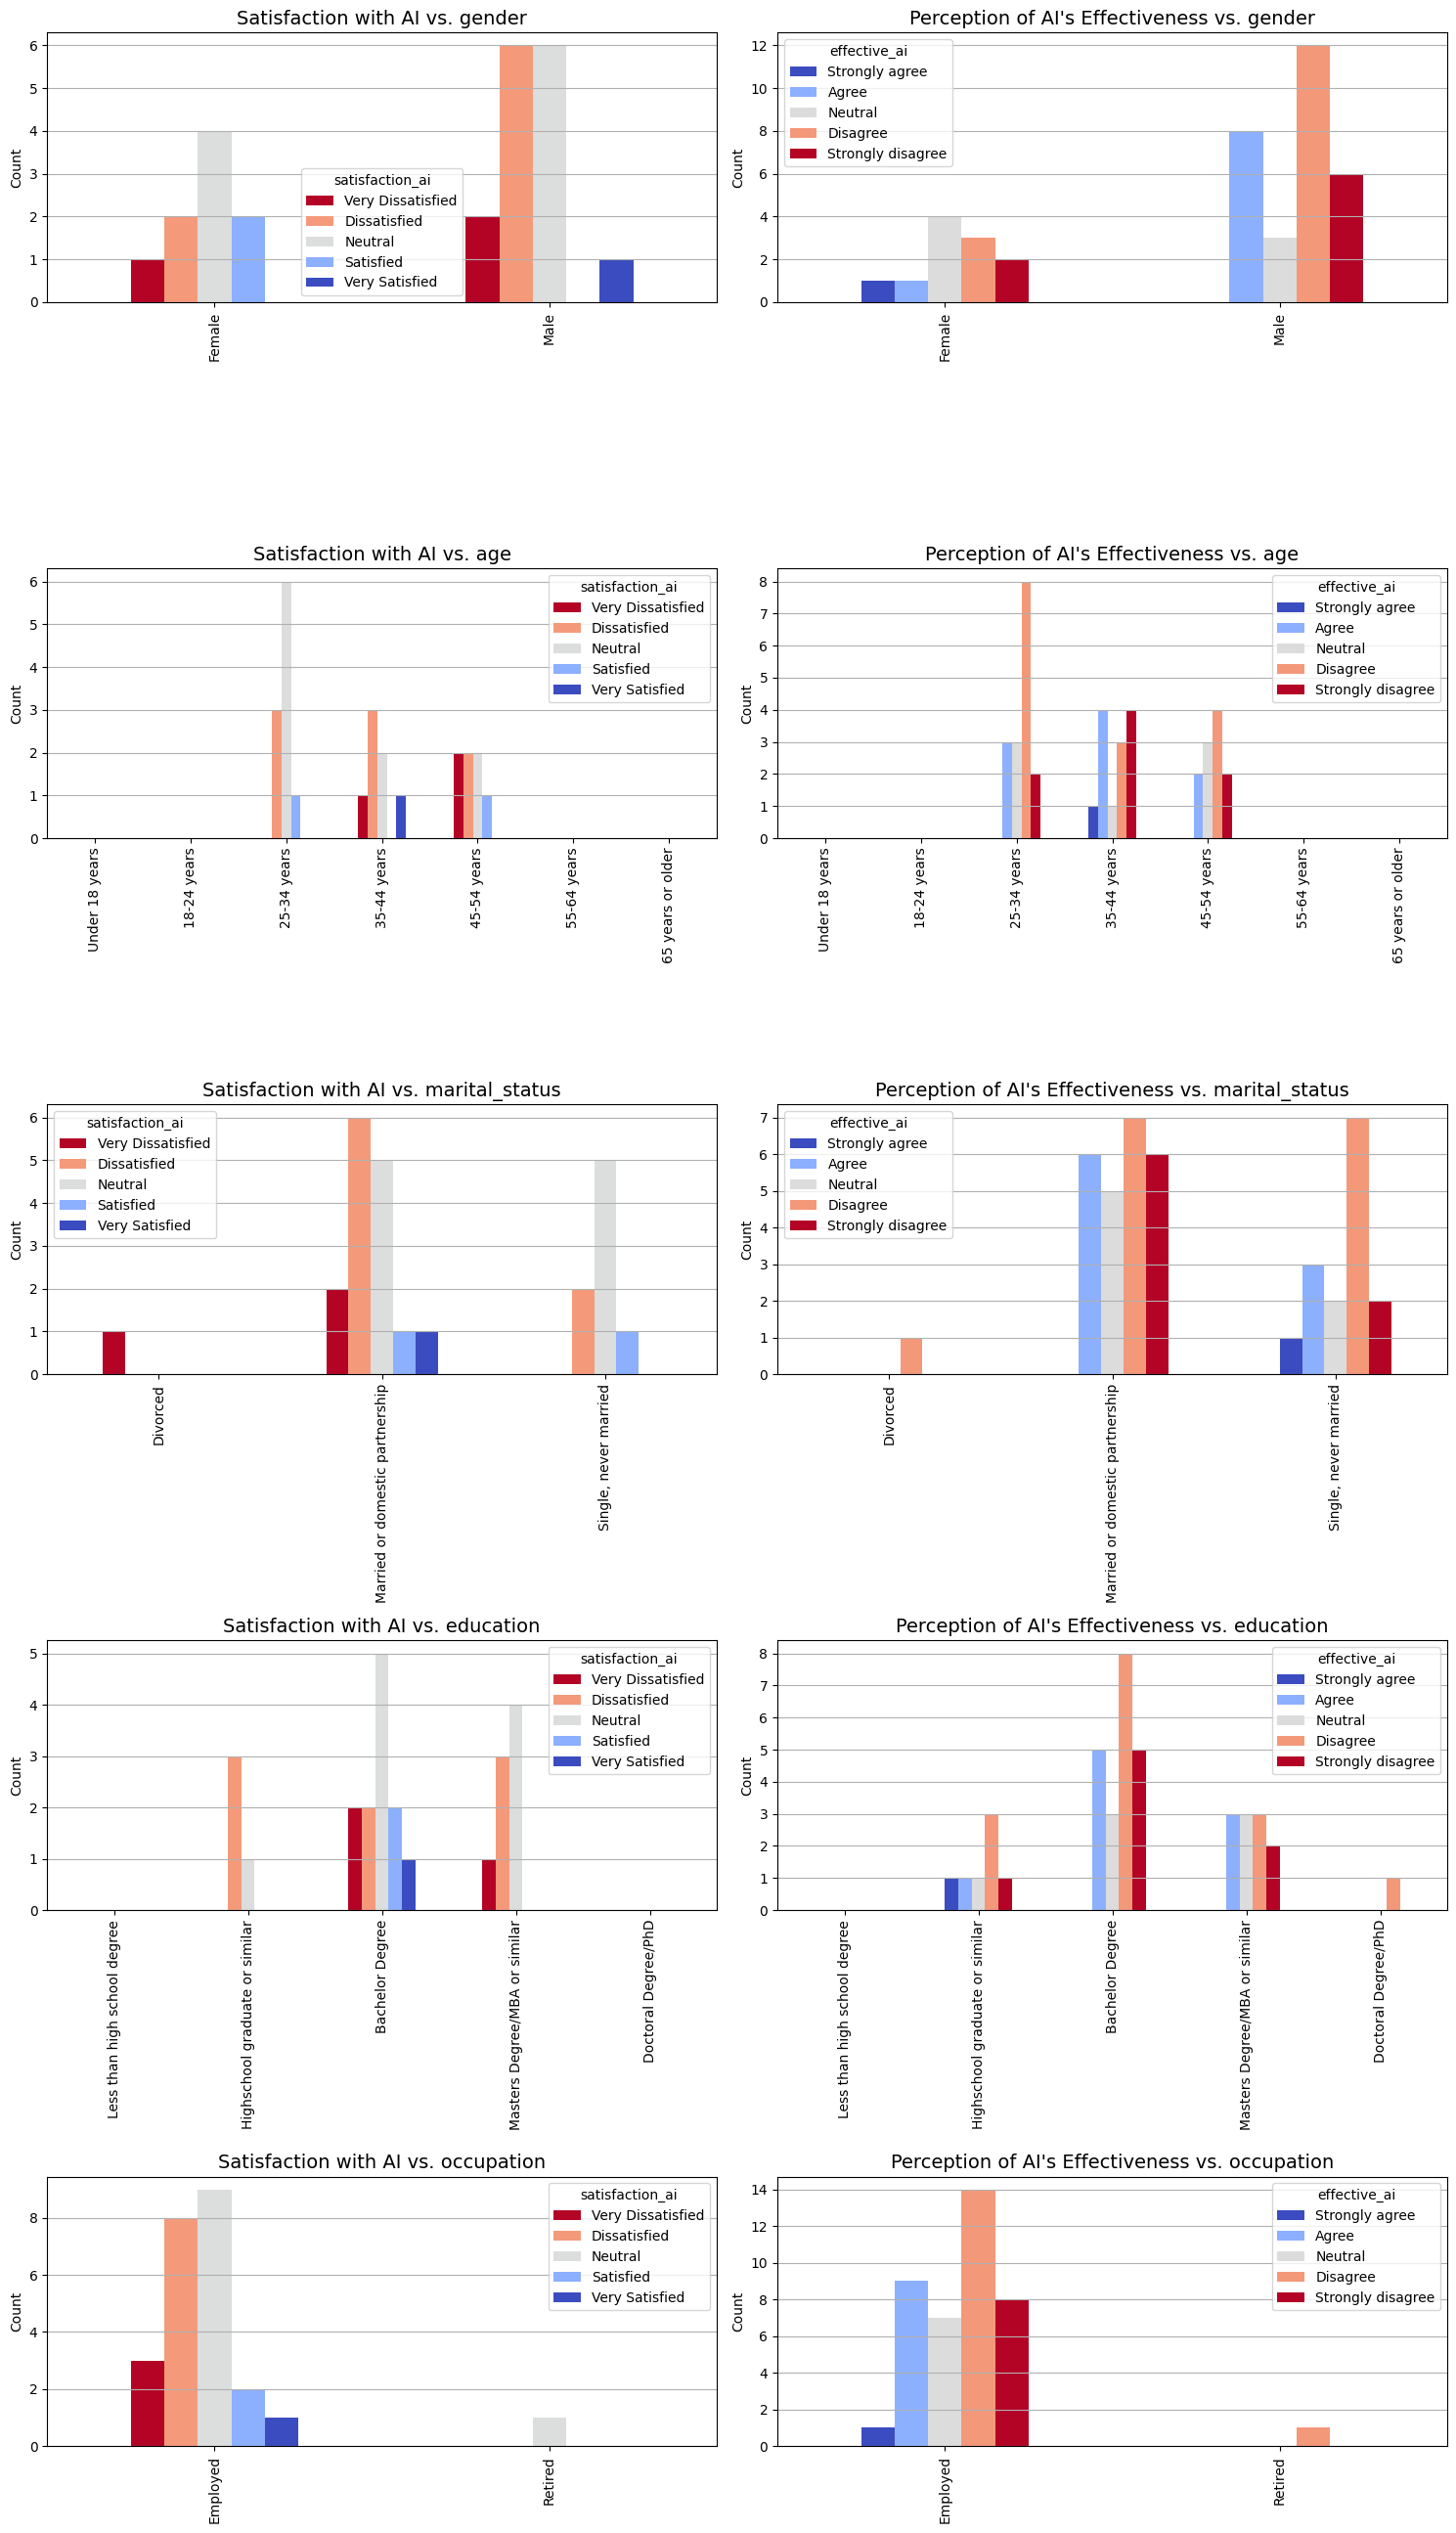

In [29]:
# list of demographic columns for reference
demographic_columns = ['gender', 'age', 'marital_status', 'education', 'occupation']

# plotting the bar charts for "Perception of AI-driven Tools"
fig, axes = plt.subplots(nrows=len(demographic_columns), ncols=2, figsize=(15, 26))

# select the color map
cmap = plt.get_cmap('coolwarm')

for i, col in enumerate(demographic_columns):
    # Satisfaction with AI vs. Demographics
    df_survey.groupby(col)['satisfaction_ai'].value_counts().unstack().plot(kind='bar', ax=axes[i, 0], colormap=cmap.reversed())
    axes[i, 0].set_title(f'Satisfaction with AI vs. {col}', fontsize=14)
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].set_xlabel(None)
    axes[i, 0].grid(axis='y')

    # Perception of AI's Effectiveness vs. Demographics
    df_survey.groupby(col)['effective_ai'].value_counts().unstack().plot(kind='bar', ax=axes[i, 1], colormap=cmap)
    axes[i, 1].set_title(f"Perception of AI's Effectiveness vs. {col}", fontsize=14)
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_xlabel(None)
    axes[i, 1].grid(axis='y')

plt.tight_layout()
plt.show()

#### 4.2.3 Relationship between Customer Satisfaction and AI

This chart illustrates the relationship between overall satisfaction and satisfaction with AI tools. The intent is to understand if respondents who are generally satisfied (or dissatisfied) with their provider also have similar feelings about AI tools.

- The x-axis represents the overall satisfaction with the service provider.
- The y-axis represents the average satisfaction level with AI tools for respondents within each overall satisfaction category.

Among the customers who have used AI tools, we do not see a clear relationship between overall satisfaction and satisfaction with AI tools. Interestingly, customers who are the most satisfied with their provider are also the most dissatisfied with AI tools.

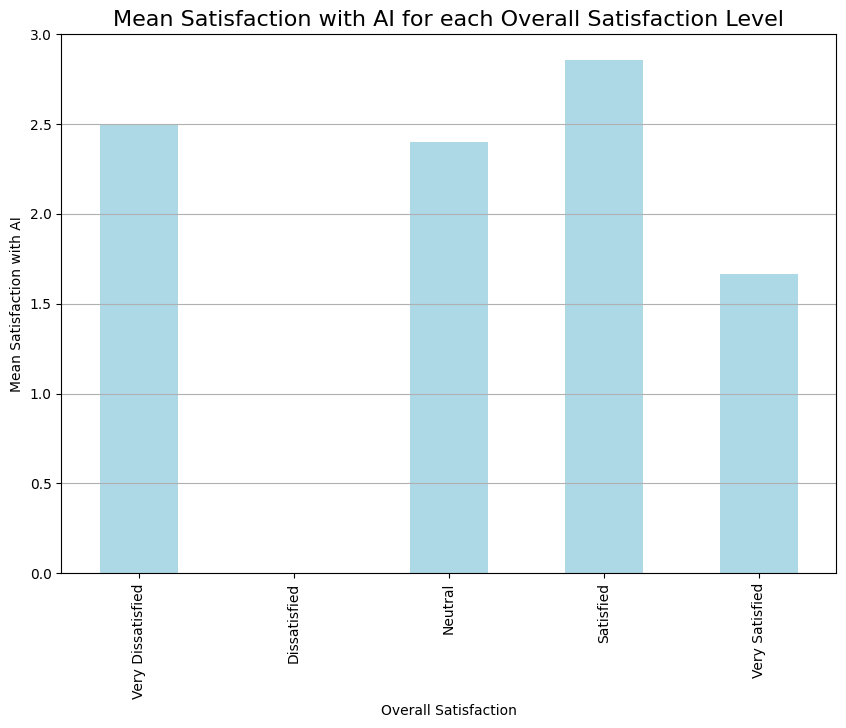

In [30]:
# add the satisfaction_ai_numeric column
plot_data:pd.DataFrame = df_survey[df_survey['satisfaction_ai'].notna()].copy()
plot_data['satisfaction_ai_numeric'] = plot_data['satisfaction_ai'].map({
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}).astype('int')

# Calculating mean satisfaction with AI for each level of overall satisfaction
mean_satisfaction_ai = plot_data \
    .groupby('satisfaction_overall')['satisfaction_ai_numeric'] \
    .mean()

# Plotting the bar chart
plt.figure(figsize=(10, 7))
mean_satisfaction_ai.plot(kind='bar', color='lightblue')
plt.title('Mean Satisfaction with AI for each Overall Satisfaction Level', fontsize=16)
plt.xlabel('Overall Satisfaction')
plt.ylabel('Mean Satisfaction with AI')
plt.grid(axis='y')
plt.show()

#### 4.2.4 Key Areas for Improvement

Here's the bar chart showcasing the top 10 areas for improvement based on the most negative reviews:

- The x-axis represents the combination of "Entity" and "Aspect" from the reviews.
- The y-axis indicates the number of negative reviews for each combination.

This visualization highlights areas with the highest number of negative sentiments, indicating areas for improvement.

Since the reviews mentioning chatbots were explicitly selected, we can see that the most negative reviews are related to aspects regarding chatbots, with the top complaint being the inability to understand the user's query.

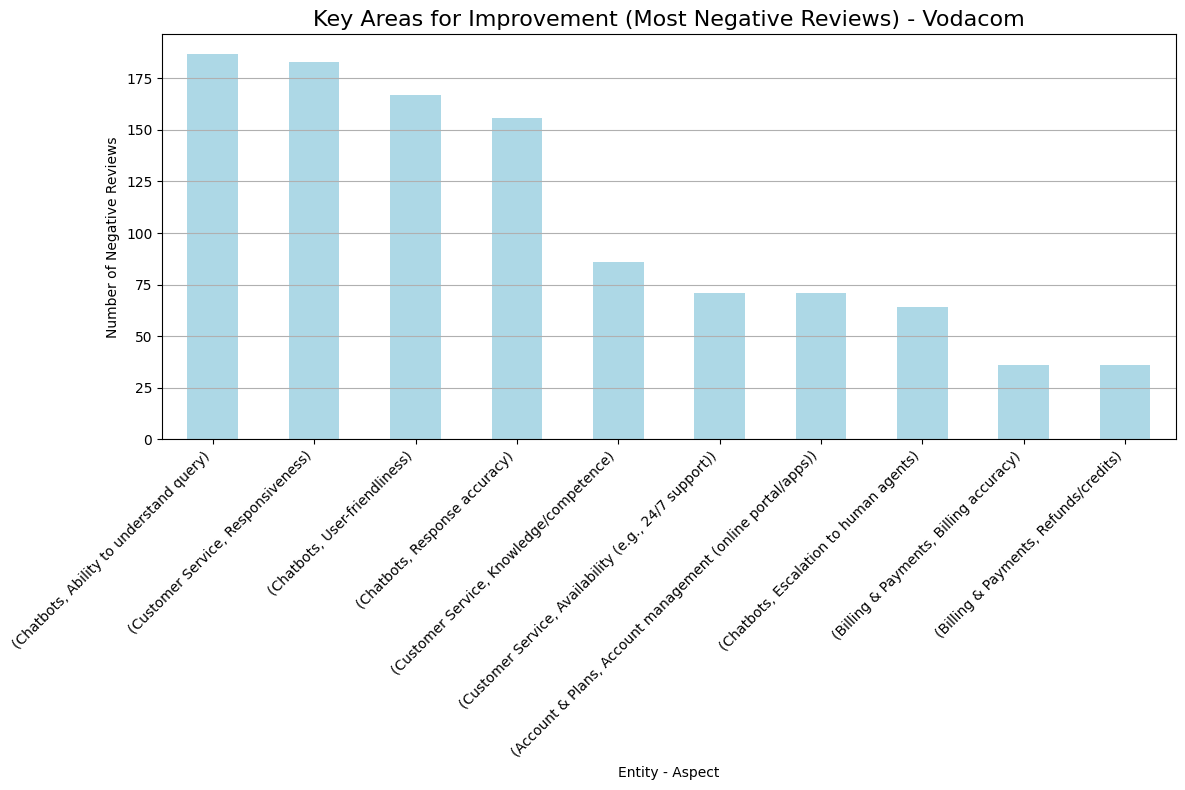

In [31]:
# Join df_aspects with df_reviews to get the provider information
df_aspects_with_provider:pd.DataFrame = df_aspects.join(df_reviews['provider'], how='left')

# Filter to include only Vodacom data
plot_data:pd.DataFrame = df_aspects_with_provider[df_aspects_with_provider['provider'] == 'Vodacom'].copy()

# Filter out the negative polarities
plot_data = plot_data[plot_data['polarity'] == 'Negative']

# Count of negative sentiments by entity and aspect
negative_counts = plot_data \
    .groupby(['entity', 'aspect']) \
    .size() \
    .sort_values(ascending=False) \
    .head(10)

# Plotting bar chart of entities and aspects sorted by most negative polarities
plt.figure(figsize=(12, 8))
negative_counts.plot(kind='bar', color='lightblue')
plt.title('Key Areas for Improvement (Most Negative Reviews) - Vodacom', fontsize=16)
plt.xlabel('Entity - Aspect')
plt.ylabel('Number of Negative Reviews')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Next, we can generate a word cloud based on the review content to visualise the most common issues. The larger words in the word cloud indicate more frequent occurrences. We can then identify recurring customer issues and prioritize them.

Combined with the earlier bar chart, this offers a comprehensive view of the key areas of concern and potential improvements, addressing RQ4.

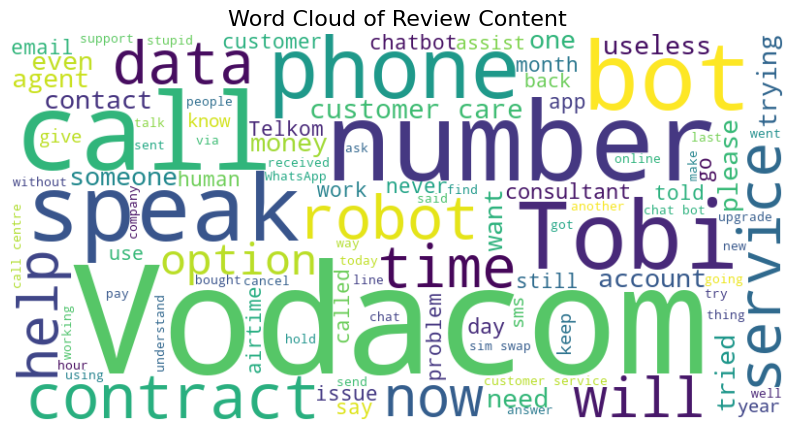

In [32]:
# Concatenate all review content
text = ' '.join(review for review in df_reviews['review_content'])

# Generate word cloud
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content', fontsize=16)
plt.show()

### 4.3 Additional Insights

#### 4.3.1 Time Series Analysis

This chart shows how the entities mentioned in Vodacom reviews have changed over time. The circle's colour depicts polarity, while the size of the circle indicates the number of mentions.

- Entities are generally mentioned in a negative light.
- Between September 2021 and July 2022, there have been more positive reviews mentioning Chatbots and Customer service.
- We notice a correlation between the number of reviews mentioning Chatbots and Customer service.

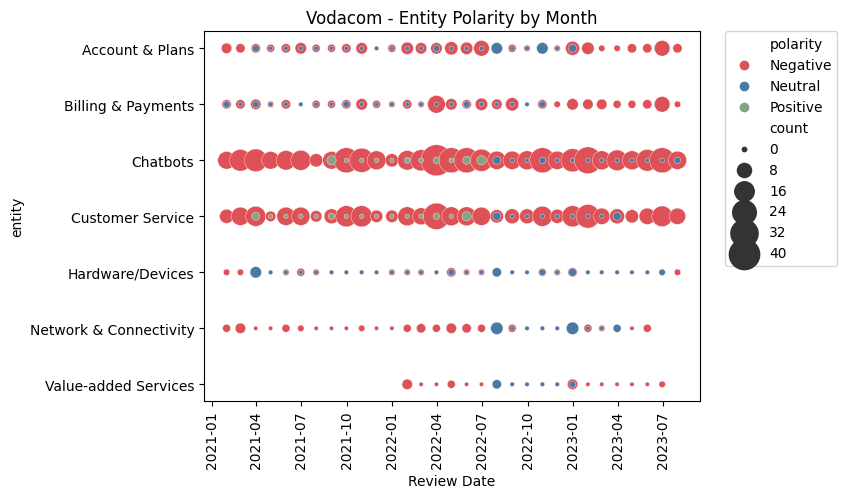

In [33]:
# Aggregate reviews by entity for Vodacom
plot_data:pd.DataFrame = pd.merge(df_reviews, df_aspects, on='id', how='left') \
    .query('provider == "Vodacom"') \
    .drop(columns=['review_title', 'review_content']) \
    .reset_index() \
    .groupby([
        'entity',
        'polarity']) \
    .resample('M', on='created_at') \
    [['id']] \
    .count() \
    .fillna(0) \
    .rename(columns={'id': 'count'})

# Select the colors to use
color_dict = dict({'Positive':'#85a482',
                  'Neutral': '#497aa4',
                  'Negative': '#de5257',
                  'Mixed': '#eb8c44'})

# Plot the data
sns.scatterplot(
    data=plot_data,
    x='created_at',
    y='entity',
    hue='polarity',
    size='count',
    palette=color_dict,
    sizes=(10, 500))

plt.title('Vodacom - Entity Polarity by Month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel('Review Date')
plt.show()    

## 5. Conclusion and evaluation

### 5.1 Key Findings

1. **Demographics and Satisfaction**: The study found little difference in satisfaction levels across different demographic groups. Most notably, younger respondents (25-34 years) tend to be neutral regarding their satisfaction with AI tools and predominantly believe AI tools are ineffective.
2. **Adoption and Perception of AI Tools**: Over half of the survey respondents have used AI tools, but a significant portion are either neutral or dissatisfied with their experience. Most respondents do not believe that AI tools are effective.
3. **Correlation between Overall Satisfaction and AI Tools**: There is no clear relationship between general satisfaction with a service provider and AI tools. Intriguingly, the most satisfied customers tend to be the most dissatisfied with AI tools.
4. **Areas for Improvement**: Reviews mentioning chatbots were primarily negative, with the most frequent complaint being the chatbot's inability to understand user queries.

### 5.2 Process and Visualisations

#### Strengths

-  The study incorporated survey data and online reviews, providing a multifaceted view of customer satisfaction. 
-  Using varied visualizations, like bar charts and word clouds, allowed for a comprehensive understanding of data patterns and relationships.

#### Areas for Improvement
- The sampling method, specifically snowball sampling, could introduce bias. Future studies might benefit from more robust sampling techniques.
- The survey's response rate was low, and a truly representative sample could not be obtained.

#### Challenges
- Extracting relevant data from Hellopeter was challenging due to the vast amount of information, but filtering for chatbot mentions was a suitable solution.
- Ensuring that survey questions did not lead respondents or introduce bias was a constant concern.
- Performing Aspect-Based Sentiment Analysis with GPT-4 was expensive, thus larger datasets could not be classified.

**Reflection on the Aims, Process, and Execution of the Study**: The aim to investigate customer satisfaction levels in the telecommunications industry, especially regarding AI-driven technologies, was successfully met. However, the process revealed the complexities of balancing traditional customer service methods with emerging AI-driven tools. 

### 5.3 Future Directions:

1. A deeper dive into why younger demographics view AI tools as ineffective could provide insights to tailor AI-driven solutions better.
2. Investigating the root causes behind the disconnect between overall satisfaction and satisfaction with AI tools might help refine these tools.
3. The data revealed substantial areas for improvement in AI-driven customer service tools. Further research could investigate how these tools can be enhanced, perhaps through improved natural language processing or better integration into the broader customer service ecosystem.
4. A comparative study across different industries might provide insights into whether the telecommunications industry's challenges are unique or part of a broader trend.
5. With the rapid evolution of AI, it would be beneficial to conduct longitudinal studies to track changing customer perceptions over time.
6. Exploring alternative AI-driven solutions beyond chatbots might reveal unexplored avenues to enhance customer satisfaction.

## References

- Baez, M., Daniel, F., Casati, F., & Benatallah, B. (2021). Chatbot Integration in Few Patterns. *IEEE Internet Computing, 25(3)*, 52–59. https://doi.org/10.1109/MIC.2020.3024605
- Castillo, D., Canhoto, A. I., & Said, E. (2021). The dark side of AI-powered service interactions: exploring the process of co-destruction from the customer perspective. *The Service Industries Journal, 41(13–14)*, 900–925. https://doi.org/10.1080/02642069.2020.1787993
- Chen, J.-S., Le, T.-T.-Y., & Florence, D. (2021). Usability and responsiveness of artificial intelligence chatbot on online customer experience in e-retailing. *International Journal of Retail & Distribution Management, 49(11)*, 1512–1531. https://doi.org/10.1108/IJRDM-08-2020-0312
- Dwivedi, Y. K., Hughes, L., Ismagilova, E., Aarts, G., Coombs, C., Crick, T., Duan, Y., Dwivedi, R., Edwards, J., Eirug, A., Galanos, V., Ilavarasan, P. V., Janssen, M., Jones, P., Kar, A. K., Kizgin, H., Kronemann, B., Lal, B., Lucini, B., … Williams, M. D. (2021). Artificial Intelligence (AI): Multidisciplinary perspectives on emerging challenges, opportunities, and agenda for research, practice and policy. *International Journal of Information Management, 57, 101994*. https://doi.org/10.1016/j.ijinfomgt.2019.08.002
- Foulds, J. (2022). Categorizing user complaints of the four largest telecommunications companies in South Africa using Topic Modelling. https://github.com/JohnnyFoulds/dsm020-2021-oct/blob/master/coursework_02/cw.ipynb
- Ganguli, S., & Roy, S. K. (2011). Generic technology‐based service quality dimensions in banking. *International Journal of Bank Marketing, 29(2)*, 168–189. https://doi.org/10.1108/02652321111107648
- Kassim, N. M. (2006). Telecommunication Industry in Malaysia: Demographics Effect on Customer Expectations, Performance, Satisfaction and Retention. *Asia Pacific Business Review, 12(4)*, 437–463. https://doi.org/10.1080/13602380600571401
- Li, C., Pan, R., Xin, H., & Deng, Z. (2020). Research on Artificial Intelligence Customer Service on Consumer Attitude and Its Impact during Online Shopping. *Journal of Physics: Conference Series, 1575(1)*, 012192. https://doi.org/10.1088/1742-6596/1575/1/012192
- Meuter, M. L., Ostrom, A. L., Roundtree, R. I., & Bitner, M. J. (2000). Self-Service Technologies: Understanding Customer Satisfaction with Technology-Based Service Encounters. *Journal of Marketing, 64(3)*, 50–64. https://doi.org/10.1509/jmkg.64.3.50.18024
- Riak, G. A., & Bill, D. B. A. (2022). The Role of Client Satisfaction in Banking Sector. *IJRDO - Journal of Social Science and Humanities Research, 8(11)*, 75–76. https://doi.org/10.53555/sshr.v8i11.5380
- Saha*, S., & Joshi, Y. C. (2019). Impact of Various Demographic Factors on Customer Satisfaction in Telecommunication Sector. *International Journal of Recent Technology and Engineering (IJRTE)*, 8(3), 4210–4217. https://doi.org/10.35940/ijrte.C5144.098319
Sardjono, W., Cholidin, A., & Johan. (2023). Implementation of Artificial Intelligence-Based Customer Relationship Management for Telecommunication Companies. *E3S Web of Conferences*, 388, 03015. https://doi.org/10.1051/e3sconf/202338803015
- Xu, Y., Shieh, C.-H., van Esch, P., & Ling, I.-L. (2020). AI Customer Service: Task Complexity, Problem-Solving Ability, and Usage Intention. *Australasian Marketing Journal*, 28(4), 189–199. https://doi.org/10.1016/j.ausmj.2020.03.005

## Word Count

The following code will count the number of words in Markdown cells. Code cells are not included.

- `Main word count` is the number of words in the main body of the text, *excluding* references or appendices.
- `References and appendices word count` is the number of words in any references or appendices.

Only `Main word count` relates to the assignment word limit. There is no limit to the number of words that can be included in references or appendices. Please note that appendices should only be used to provide context or supporting information. *No marks will be directly awarded for material submitted in appendices*.

Important:

- Please do not modify the word count code!
- To exclude references from your word count **you must** have a cell that starts with the text `## References`. Everything below this cell will not count towards the main word count.
- If you are submitting additional material as appendices **you must** have a cell that starts with the text `## Appendices`. Everything below this cell will not count towards the main word count. If you do not have any appendices you can delete the `## Appendices` cell.
- Code comments should only be used to explain details of the implementation, not for discussing your findings. All analysis commentary **must** be written in Markdown cells. *No marks will be awarded for analysis discussion submitted as comments in code cells*.

In [34]:
%%js

// Run this cell to update your word count.

function wordcount() {
    let wordCount = 0
    let extraCount = 0
    let mainBody = true

    let cells = Jupyter.notebook.get_cells()
    cells.forEach((cell) => {
        if (cell.cell_type == 'markdown') {
            let text = cell.get_text()
            // Stop counting as main body when get to References or Appendices.
            if (text.startsWith('## References') ||
                text.startsWith('## Appendices')) {
                mainBody = false
            }
            if (text.startsWith('## Word Count')) {
                text = ''
            }
            if (text) {
                let words = text.toLowerCase().match(/\b[a-z\d]+\b/g)
                if (words) {
                    let cellCount = words.length
                    if (mainBody) {
                        wordCount += cellCount
                    } else {
                        extraCount += cellCount
                    }
                }
            }
        }
    })
    return [wordCount, extraCount]
}

let wc = wordcount()
element.append(`Main word count: ${wc[0]} (References and appendices word count: ${wc[1]})`)

<IPython.core.display.Javascript object>